In [38]:
from libpgm.graphskeleton import GraphSkeleton
from libpgm.nodedata import NodeData
from libpgm.discretebayesiannetwork import DiscreteBayesianNetwork
from libpgm.tablecpdfactorization import TableCPDFactorization
import pandas as pd
import numpy as np

In [2]:
def getTableCPD():
    nd = NodeData()
    skel = GraphSkeleton()
    jsonpath="student.txt"
    nd.load(jsonpath)
    skel.load(jsonpath)
    # load bayesian network
    bn = DiscreteBayesianNetwork(skel, nd)
    tablecpd=TableCPDFactorization(bn)
    return tablecpd

In [3]:
def getBN():
    nd = NodeData()
    skel = GraphSkeleton()
    jsonpath="student.txt"
    nd.load(jsonpath)
    skel.load(jsonpath)
    # load bayesian network
    bn = DiscreteBayesianNetwork(skel, nd)
    return bn

In [4]:
bn = getBN()

In [5]:
bn.V

[u'Difficulty', u'Intelligence', u'Grade', u'SAT', u'Letter']

In [6]:
bn.E

[[u'Intelligence', u'Grade'],
 [u'Difficulty', u'Grade'],
 [u'Intelligence', u'SAT'],
 [u'Grade', u'Letter']]

In [7]:
bn.Vdata

{u'Difficulty': {u'children': [u'Grade'],
  u'cprob': [0.6, 0.4],
  u'numoutcomes': 2,
  u'ord': 0,
  u'parents': None,
  u'vals': [u'easy', u'hard']},
 u'Grade': {u'children': [u'Letter'],
  u'cprob': {u"['easy', 'high']": [0.9, 0.08, 0.02],
   u"['easy', 'low']": [0.3, 0.4, 0.3],
   u"['hard', 'high']": [0.5, 0.3, 0.2],
   u"['hard', 'low']": [0.05, 0.25, 0.7]},
  u'numoutcomes': 3,
  u'ord': 2,
  u'parents': [u'Difficulty', u'Intelligence'],
  u'vals': [u'A', u'B', u'C']},
 u'Intelligence': {u'children': [u'SAT', u'Grade'],
  u'cprob': [0.7, 0.3],
  u'numoutcomes': 2,
  u'ord': 1,
  u'parents': None,
  u'vals': [u'low', u'high']},
 u'Letter': {u'children': None,
  u'cprob': {u"['A']": [0.1, 0.9],
   u"['B']": [0.4, 0.6],
   u"['C']": [0.99, 0.01]},
  u'numoutcomes': 2,
  u'ord': 4,
  u'parents': [u'Grade'],
  u'vals': [u'weak', u'strong']},
 u'SAT': {u'children': None,
  u'cprob': {u"['high']": [0.2, 0.8], u"['low']": [0.95, 0.05]},
  u'numoutcomes': 2,
  u'ord': 3,
  u'parents': [u

In [8]:
bn.V

[u'Difficulty', u'Intelligence', u'Grade', u'SAT', u'Letter']

In [9]:
aSample = bn.randomsample(1)[0]

In [10]:
aSample

{u'Difficulty': u'hard',
 u'Grade': u'C',
 u'Intelligence': u'low',
 u'Letter': u'weak',
 u'SAT': u'lowscore'}

In [11]:
varValEncodings = {variable: {v: i for i,v in enumerate(bn.Vdata[variable]['vals'])} for variable in bn.Vdata.keys()}

In [12]:
varValEncodings

{u'Difficulty': {u'easy': 0, u'hard': 1},
 u'Grade': {u'A': 0, u'B': 1, u'C': 2},
 u'Intelligence': {u'high': 1, u'low': 0},
 u'Letter': {u'strong': 1, u'weak': 0},
 u'SAT': {u'highscore': 1, u'lowscore': 0}}

In [13]:
def encodedSample(aSample, varValEncodings, bn):
    return [varValEncodings[aVar][aSample[aVar]] for aVar in bn.V]
    

In [14]:
encodedSample(aSample, varValEncodings, bn)

[1, 0, 2, 0, 0]

In [15]:
def encodedSamples(numSamples, bn):
    varValEncodings = {variable: {v: i for i,v in enumerate(bn.Vdata[variable]['vals'])} for variable in bn.V}
    samples = bn.randomsample(numSamples)
    return pd.DataFrame([encodedSample(aSample, varValEncodings, bn) for aSample in samples], columns=bn.V)

In [16]:
lotsaSamples = encodedSamples(100000, bn)

In [17]:
lotsaSamples[[variable for variable in bn.V]].head(10)

,Difficulty,Intelligence,Grade,SAT,Letter
0,0,0,1,0,0
1,0,0,0,1,1
2,1,0,2,0,0
3,0,0,2,0,0
4,1,1,0,1,1
5,0,0,1,0,0
6,0,0,2,0,0
7,0,0,0,0,1
8,0,0,1,0,1
9,0,0,1,0,0


In [18]:
%%bash
head -10 student_100kSamples.csv

0,0,1,0,1
0,0,0,0,1
0,0,0,0,1
0,0,2,0,0
1,1,1,1,0
1,1,0,1,1
0,1,0,1,1
0,0,2,0,0
1,1,1,1,1
1,0,2,0,0


In [19]:
lotsaSamples[[variable for variable in bn.V]].to_csv('student_100kSamples.csv', index=False, header=False)

In [20]:
nvals=np.array([bn.Vdata[variable]['numoutcomes'] for variable in bn.V], dtype=np.int8)

In [21]:
np.set_printoptions(suppress=True)
np.savetxt('student_nvals.csv', nvals.astype(int),delimiter=',', fmt='%i',)

In [22]:
%%bash
cat student_nvals.csv

2
2
3
2
2


In [23]:
import graphviz as gv

In [24]:
vertexEncodings = {v: i for i,v in enumerate(bn.V)}

In [25]:
vertexEncodings

{u'Difficulty': 0, u'Grade': 2, u'Intelligence': 1, u'Letter': 4, u'SAT': 3}

In [26]:
edgesEncoded = [[vertexEncodings[edge[0]],vertexEncodings[edge[1]] ]for edge in bn.E]

In [27]:
edgesEncoded

[[1, 2], [0, 2], [1, 3], [2, 4]]

In [28]:
g1 = gv.Graph(format='svg')

In [29]:
bn.V, bn.E

([u'Difficulty', u'Intelligence', u'Grade', u'SAT', u'Letter'],
 [[u'Intelligence', u'Grade'],
  [u'Difficulty', u'Grade'],
  [u'Intelligence', u'SAT'],
  [u'Grade', u'Letter']])

In [30]:
g1.node('Difficulty')

In [31]:
g1.node('Grade')

In [32]:
g1.edge('Difficulty', 'Grade')

In [33]:
type(g1.source)

str

In [34]:
from graphviz import Digraph

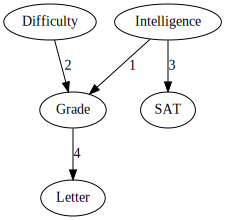

In [60]:
wt=0
dot = Digraph(comment='Student Network')
for v,i in vertexEncodings.items():
    dot.node(chr(i+96).upper(), v)
for edge in edgesEncoded:
    wt += 1
    dot.edge(chr(edge[0]+96).upper(),chr(edge[1]+96).upper(), label="{0}".format(wt))
dot

In [36]:
chr(97).upper()

'A'

In [37]:
import sys
sys.path

['',
 '/Users/eliotpbrenner/spark-1.1.0-bin-hadoop1/python',
 '/Users/eliotpbrenner/Projects/julia',
 '/Users/eliotpbrenner/anaconda/lib/python27.zip',
 '/Users/eliotpbrenner/anaconda/lib/python2.7',
 '/Users/eliotpbrenner/anaconda/lib/python2.7/plat-darwin',
 '/Users/eliotpbrenner/anaconda/lib/python2.7/plat-mac',
 '/Users/eliotpbrenner/anaconda/lib/python2.7/plat-mac/lib-scriptpackages',
 '/Users/eliotpbrenner/anaconda/lib/python2.7/lib-tk',
 '/Users/eliotpbrenner/anaconda/lib/python2.7/lib-old',
 '/Users/eliotpbrenner/anaconda/lib/python2.7/lib-dynload',
 '/Users/eliotpbrenner/.local/lib/python2.7/site-packages',
 '/Users/eliotpbrenner/anaconda/lib/python2.7/site-packages/Sphinx-1.3.1-py2.7.egg',
 '/Users/eliotpbrenner/anaconda/lib/python2.7/site-packages/setuptools-18.5-py2.7.egg',
 '/Users/eliotpbrenner/anaconda/lib/python2.7/site-packages',
 '/Users/eliotpbrenner/anaconda/lib/python2.7/site-packages/aeosa',
 '/Users/eliotpbrenner/anaconda/lib/python2.7/site-packages/IPython/exten

In [ ]:
pycall